<a href="https://colab.research.google.com/github/showravj2-create/simple_data_analysis/blob/main/process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ID             10 non-null     int64
 1   Age            10 non-null     int64
 2   Hours_Studied  10 non-null     int64
 3   Exam_Score     10 non-null     int64
dtypes: int64(4)
memory usage: 452.0 bytes

--- Summary Statistics ---

--- Missing Values ---
ID               0
Age              0
Hours_Studied    0
Exam_Score       0
dtype: int64


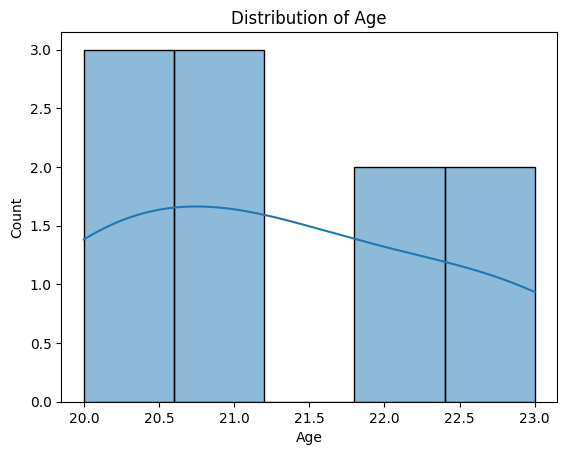

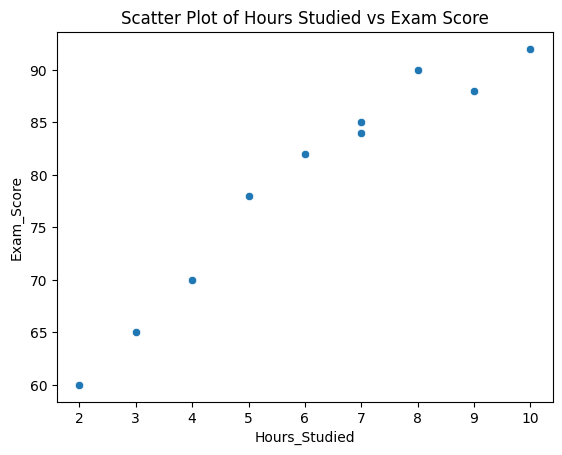

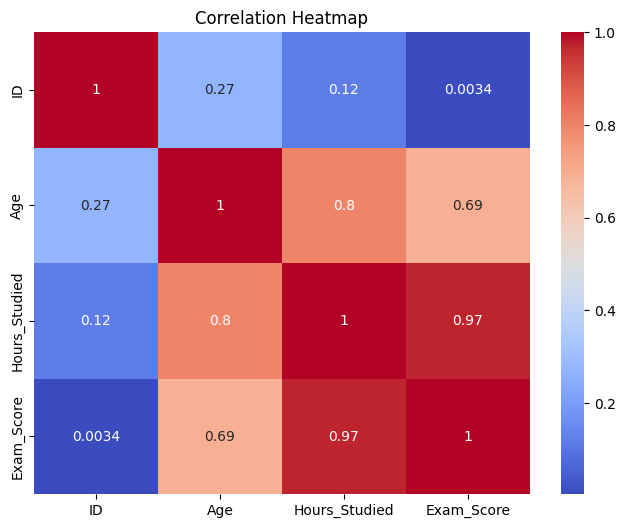

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests

# Load dataset from GitHub URL
url = "https://raw.githubusercontent.com/showravj2-create/simple_data_analysis/main/sample_data_set.cvs" # Corrected extension to .csv

try:
    response = requests.get(url)
    response.raise_for_status() # Raise an exception for bad status codes
    # Assuming the first row is header
    data = pd.read_csv(url)

except requests.exceptions.RequestException as e:
    print(f"Error downloading the file: {e}")
    data = pd.DataFrame() # Create an empty DataFrame on error
except pd.errors.EmptyDataError:
    print("Error: The downloaded file is empty.")
    data = pd.DataFrame()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    data = pd.DataFrame()


# Convert relevant columns to numeric, coercing errors
if not data.empty:
    data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
    data['Hours_Studied'] = pd.to_numeric(data['Hours_Studied'], errors='coerce')
    data['Exam_Score'] = pd.to_numeric(data['Exam_Score'], errors='coerce')


    # Basic info
    print("\n--- Dataset Info ---")
    data.info()
    print("\n--- Summary Statistics ---")
    data.describe()

    # Missing values
    print("\n--- Missing Values ---")
    print(data.isnull().sum())

    # Plot histogram (of a numeric column, e.g., Age)
    if 'Age' in data.columns and pd.api.types.is_numeric_dtype(data['Age']):
        sns.histplot(data['Age'].dropna(), kde=True)
        plt.title("Distribution of Age")
        plt.show()
    else:
        print("\n--- Histogram Skipped ---")
        print("The 'Age' column is not available or not numeric for a histogram.")


    # Scatter plot (first two numeric columns, now using column names)
    numeric_cols = data.select_dtypes(include=np.number)
    if 'Hours_Studied' in numeric_cols.columns and 'Exam_Score' in numeric_cols.columns:
        sns.scatterplot(x=data['Hours_Studied'], y=data['Exam_Score'])
        plt.title("Scatter Plot of Hours Studied vs Exam Score")
        plt.show()
    else:
        print("\n--- Scatter Plot Skipped ---")
        print("Not enough numeric columns ('Hours_Studied', 'Exam_Score') for a scatter plot.")


    # Correlation heatmap
    if not numeric_cols.empty and numeric_cols.shape[1] > 1:
        plt.figure(figsize=(8, 6))
        sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
        plt.title("Correlation Heatmap")
        plt.show()
    else:
        print("\n--- Correlation Heatmap Skipped ---")
        print("Not enough numeric columns for a correlation heatmap.")

else: # This else corresponds to the initial 'if not data.empty:'
    print("DataFrame is empty. Cannot proceed with analysis and plotting.")